In [ ]:
import pandas as pd #импорт библиотеки пандас
import numpy as np
import matplotlib.pyplot as plt#импорт библиотеки матплотлиб

df = pd.read_csv('C:/Users/User/OneDrive/Документы/S02-hw-dataset.csv')
#Просмотр данных
print(df.head())#вывод первых 5 строчек датасета
print(df.info())#информация о датасете
print(df.describe())#нормальность распределения




   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000

In [7]:
#Доля пропусков
print(df.isna().mean())

#Дубликаты
duplicates = df.duplicated().sum()
print('Количество дубликатов', duplicates)

#Поиск подозрительных значений
unreal_age = df[(df['age'] < 0) | (df['age'] > 100)]  # например, нереальные значения возраста
print(unreal_age)
null_str = df[df.isnull().all(axis=1)]#незаполненые строки в странах
print(null_str)
negative_purchases = df[df['purchases'] < 0]#отрицательные покупки
print(negative_purchases)
zero_revenue_nonzero_purchases = df[(df['revenue'] == 0) & (df['purchases'] != 0)]#нулевой доход при при не нулевых количествах покупок
print(zero_revenue_nonzero_purchases)
negative_revenue = df[df['revenue'] < 0]#отрицательный доход
print(negative_revenue)


user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64
Количество дубликатов 1
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []


В данном промежутке задания, я проверял неправдивый возраст, пустые строчки, отрицательные покупки, нулевой доход при не нудевых покупках, отрицательный доход.
Найденные проблемы: 
1) возраст > 100 - 6 user_id - 120 лет
2) отриуательные покупки - 6 user_id - purchases = -1
3) нулевой доход при не нулевых покупках - 11 user_id - revenue = 0

In [26]:
# Частоты категориальных переменных
print(df['country'].value_counts())

# Группировка
grouped = df.groupby('country').agg({'revenue': ['mean', 'sum']})
print(grouped)

# Создание бинов
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 50, 100], labels=['0-18', '19-30', '31-50', '51-100'])
print(df['age_group'].value_counts())

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64
             revenue       
                mean    sum
country                    
CN       1054.000000   2108
DE       1445.500000   8673
FR        675.916667   8111
RU        790.076923  10271
US        557.375000   4459
age_group
31-50     17
19-30     13
51-100     6
0-18       2
Name: count, dtype: int64


Была выполнена частота контри, тоесть сколько раз встречаюстя разные страны, и по анализу было выведено, что RU и FR, RU - 13 раз, FR - 12 раз.
Дальше была произведенена групировка с помощью groupby, я сгрупировал столбец country и столбец revenue по mean и sum, и увидел что первые две строчки занимает CN и DE.
После я создал бином, в котором сделал группы возраста, и в итоге увидел, что большенство людей с возрастом в диапазоне 31-50 лет, потом идут 19-30, потом 51-100 и 0-18.

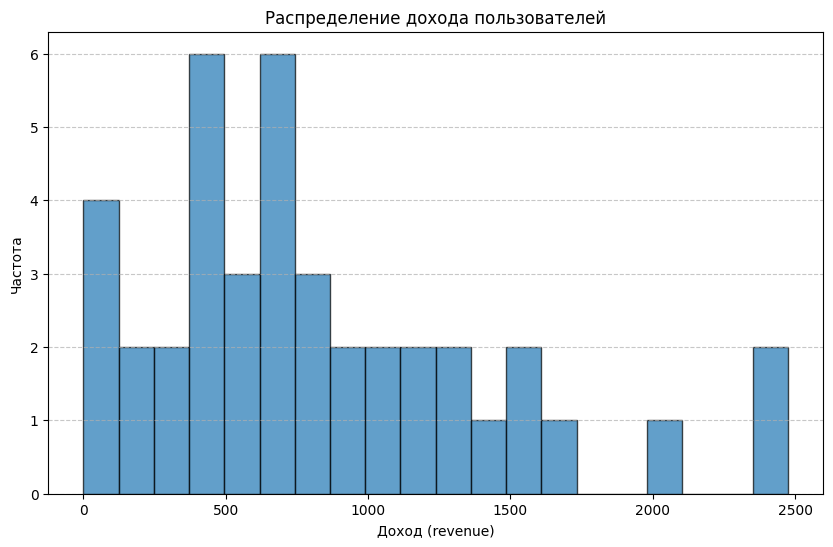

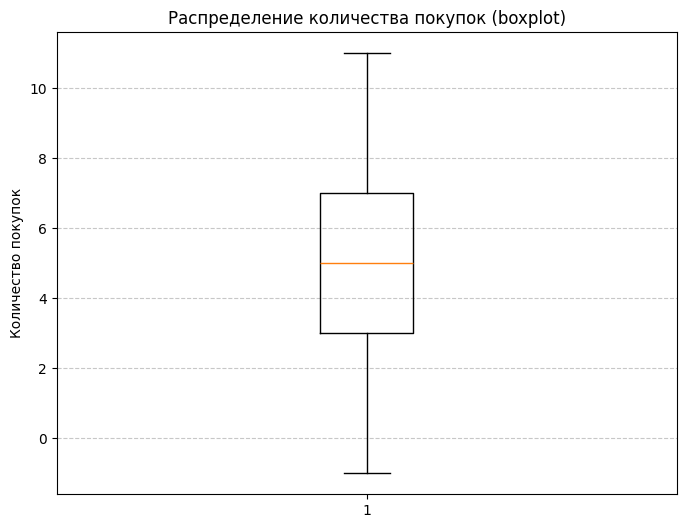

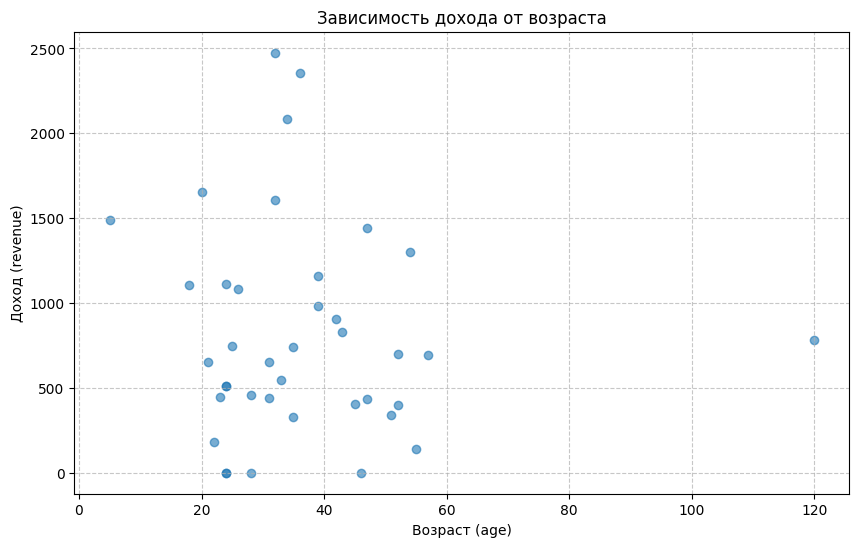

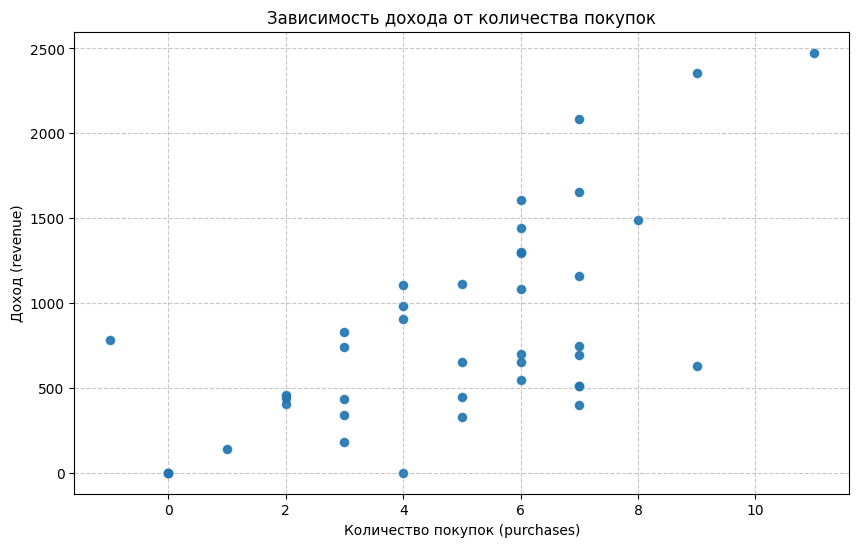

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/User/OneDrive/Документы/S02-hw-dataset.csv')
#Гистограммма
plt.figure(figsize=(10, 6))
plt.hist(df['revenue'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Доход (revenue)')
plt.ylabel('Частота')
plt.title('Распределение дохода пользователей')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('C:/Users/User/mirea-aie-2025/homeworks/HW02/figures/hist.png', dpi=300, bbox_inches='tight')
plt.show()

#Боксплот
plt.figure(figsize=(8, 6))
plt.boxplot(df['purchases'].dropna()) # dropna() убирает NaN перед построением
plt.ylabel('Количество покупок')
plt.title('Распределение количества покупок (boxplot)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('C:/Users/User/mirea-aie-2025/homeworks/HW02/figures/boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

#Диаграмма
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['revenue'], alpha=0.6)
plt.xlabel('Возраст (age)')
plt.ylabel('Доход (revenue)')
plt.title('Зависимость дохода от возраста')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('C:/Users/User/mirea-aie-2025/homeworks/HW02/figures/scatter.png', dpi=300, bbox_inches='tight')
plt.show()

#Обычный график зависимости revenue от purchases
plt.figure(figsize=(10, 6))
plt.scatter(df['purchases'], df['revenue'], alpha=0.7)
plt.plot(df['purchases'], df['revenue'], linestyle='none', marker='o', markersize=5, alpha=0.7) # Добавим линии между точками (если нужно, иначе можно убрать эту строку)
plt.xlabel('Количество покупок (purchases)')
plt.ylabel('Доход (revenue)')
plt.title('Зависимость дохода от количества покупок')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('C:/Users/User/mirea-aie-2025/homeworks/HW02/figures/scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()



